# **LAB 01**
## Analysis of Heart Disease Dataset

By 


*  Pearly Paul
*  Harry Wang
*  Rayon Morris













# **Business Understanding**

"Cardiovascular diseases (CVDs), a group of heart and blood vessel disorders, are the number one cause of death and disability globally. Hypertension, or high blood pressure, is a leading risk factor for CVD and causes over 10 million deaths worldwide each year. Hypertension treatment is simple, effective, and affordable, yet the condition is often overlooked because it typically does not produce symptoms. Left untreated, this “silent killer” can lead to heart disease, stroke, and kidney failure."

Centers for Disease Control and Prevention. "Cardiovascular Diseases." *CDC,* https://www.cdc.gov/globalhealth/healthprotection/ncd/cardiovascular-diseases.html. 5/8/2022


The dataset was provided for use on Kaggle.com to determine if, through the usage of Data Mining and Machine Learning, we'd be able predict whether or not a patient is has Heart Disease. This would be done through the use of available features provided at a regular doctor's visit. 

We'll know if we uncovered knowledge within the data if we're able to 1. predict, with great accuracy, Heart Disease from the features we have, and 2. Identify the most important features for predicticting Heart Disease.

We'd measure the effectiveness of a good prediction algorithm by looking at the model's accuracy. We'd aim for an accuracy that's about 85% or higher.



# **Data Description**

<a id=s2>

The dataset is comprises of 12 Features and 70,000 objects, including a Target Variable of the presence or absence of Heart Disease.

Features:
*   Age
*   Height
*   Weight
*   Gender
*   Systolic blood pressure (ap_hi)
*   Diastolic blood pressure (ap_lo)
*   Cholesterol
*   Glucose (gluc)
*   Smoking (smoke)
*   Alcohol intake (alco)
*   Physical activity (active)

Target Variable:

*   Presence or Absence of cardiovascular disease - cardio





## Loading the Dataset

In [ ]:
## Loading all the packages required for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.core import count
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas.plotting
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
## Load the dataset from our Team GitHub Repository

url=(r'https://github.com/CivetWang/Machine-Learning/blob/main/cardio_train.csv?raw=true')
df_Cardio = pd.read_csv(url,sep=';',index_col=0)

In [ ]:
# Print out the first 5 rows from our dataset to ensure we read it in correctly.
df_Cardio.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

# **Data Quality**

In [ ]:
# Run the null detect for data quality
df_Cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no **null** values in the cardiovascular dataset





In [ ]:
# Run the missing detect for data quality
nanvalues = df_Cardio.isna().any()
print(nanvalues)

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool


*There* are no NAN values in the dataset. So we decided to proceed without analysis.

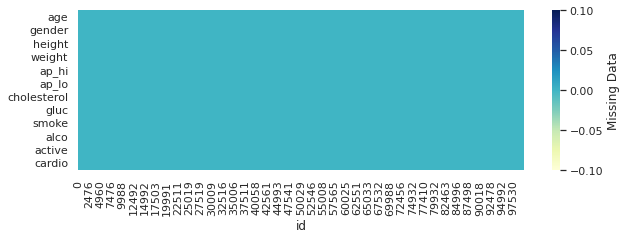

In [ ]:
## Missing Plot to visualize if any missing values . We can see he missing values here 
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.heatmap(df_Cardio.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


For better understanding we **visualized** the missing values in the dataset.<br>The **visualization** agrees the dataset doesn't have any missing.

In [ ]:
## To print the count of Features and Rows we have in the dataset. This would make us understand the dataset more better.
print("The number of Features in the dataset :" ,df_Cardio.shape[1])
print("The number of rows in the dataset :" ,df_Cardio.shape[0])

The number of Features in the dataset : 12
The number of rows in the dataset : 70000


In [ ]:
## Initial data type check and count check
df_Cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 9.0 MB


**OBSERVATIONS**
1. Age is an integer variable and is recorded in Days instead of Years. For our 
analysis, we will convert it to Years.
2. Gender is an integer variable with 1 being a female and 2 being a male. For our analysis, we will convert it into a categorical variable with Male and Female as the values.
3. Height is an integer variable and is recorded in cm. For our analysis, we will use it as is.
4. Weight is an integer variable and is recorded in cm. For our analysis, we will use it as is.
5. Both ap_hi and ap_lo are integers. For our analysis, we will use it as is.
6. Also, what about the other attributes? Should we label them to be as below?
7. Cholesterol is an integer variable with 1 being normal, 2 being above normal, and 3 being well above normal. For our analysis, we will convert it into a categorical variable using the normal, above normal, and extremely normal as the values.
8. Glucose is an integer variable with 1 being normal, 2 being above normal, and 3 being well above normal. For our analysis, we will convert it into a categorical variable using the normal, above normal, and extremely normal as the values.
9. Smoke is an integer variable with 1 being Yes (smoker) and 0 being (nonsmoker). For our analysis, we will convert it into a categorical variable with Yes and No as the values.
10. Alcohol is an integer variable with 1 being Yes (Alcoholic) and 0 being (nonAlcoholic). For our analysis, we will convert it into a categorical variable with Yes and No as the values.
11. Physical Activity is an integer variable with 1 being Yes (Physically Active) and 0 being (Sedentary). For our analysis, we will convert it into a categorical variable with Yes and No as the values.

In [ ]:
# Summary of the Original Dataset for initial EDA and data cleaning
df_Cardio.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

**OBSERVATIONS**

<p> From the summary statistics, we can see that the maximum and minimum values of the two blood pressure stats are outliers. Systolic blood pressure and Diastolic blood pressure are not expected to above the range of 240/190 respectively. In such case, data manipulation is necessary for further investigation. 

In [ ]:
# Creating a new variable df_Cardio_updated for analysis purpose
# For distinguishing the raw data versus what's used for Analysis.

df_Cardio_updated = df_Cardio.copy()

In [ ]:
## Data Transformation
# Converting Attributes for Data Analysis - From Numerical representated Categorical to Human Language Categorical

col=["smoke","alco","active","cardio"]
df_Cardio_updated[col]=df_Cardio_updated[col].replace((1, 0),('Yes', 'No'))
df_Cardio_updated["gender"]=df_Cardio_updated["gender"].replace((1, 2),('Female', 'Male'))
cols=["cholesterol","gluc"]
df_Cardio_updated[cols]=df_Cardio_updated[cols].replace((1,2,3),('normal','above normal','well above normal'))
df_Cardio_updated.head()

age  gender  height  weight  ap_hi  ap_lo        cholesterol    gluc  \
id                                                                           
0   18393    Male     168    62.0    110     80             normal  normal   
1   20228  Female     156    85.0    140     90  well above normal  normal   
2   18857  Female     165    64.0    130     70  well above normal  normal   
3   17623    Male     169    82.0    150    100             normal  normal   
4   17474  Female     156    56.0    100     60             normal  normal   

   smoke alco active cardio  
id                           
0     No   No    Yes     No  
1     No   No    Yes    Yes  
2     No   No     No    Yes  
3     No   No    Yes    Yes  
4     No   No     No     No

<p> We successfully updated the records to reflect the changes to the feature values outlined above.

In [ ]:
## Convert the age in days to Age in Years
## converted the Age_in_years to int from float64

df_Cardio_updated["Age_in_years"]= pd.to_numeric(df_Cardio_updated["age"]/365)
df_Cardio_updated["Age_in_years"]= df_Cardio_updated["Age_in_years"].astype(int)

## Deleted the age column because we converted the Age to Age in years
del df_Cardio_updated['age']


We created a new feature named **Age_in_years** to hold the transformation of the age variable from  **days** to **years**. This would help us analyze the data more effectively.


In [ ]:
## Changing the Column names

df_Cardio_updated.rename(columns={'alco': 'Alcoholic', 'cardio': 'Heart_Disease',
                                  }, inplace=True)
df_Cardio_updated.head()

gender  height  weight  ap_hi  ap_lo        cholesterol    gluc smoke  \
id                                                                          
0     Male     168    62.0    110     80             normal  normal    No   
1   Female     156    85.0    140     90  well above normal  normal    No   
2   Female     165    64.0    130     70  well above normal  normal    No   
3     Male     169    82.0    150    100             normal  normal    No   
4   Female     156    56.0    100     60             normal  normal    No   

   Alcoholic active Heart_Disease  Age_in_years  
id                                               
0         No    Yes            No            50  
1         No    Yes           Yes            55  
2         No     No           Yes            51  
3         No    Yes           Yes            48  
4         No     No            No            47

We modified some column names to a more understandable format.
1.   Alco --> Alcohol
2.   Cardio --> Heart_Disease

Now here we are analyzing **odds** of a person getting **cardiovascular Disease**.

**Note :** There are multiple Heart Diseases some examples are below. Because when a non medical person thinks about Heart Disease they are only aware of Heart Attack or Stroke . The below Cardiovascular disease can happen to people at all age. 

1.   Abnormal heart rhythms, or arrhythmias
2.   Aorta disease and Marfan syndrome
3.   Congenital heart disease 
4.   Coronary artery disease (narrowing of the arteries)
5.   Stroke
6.   Peripheral vascular disease
7.   Heart muscle disease (cardiomyopathy)
6.   Heart failure
7.   Heart attack



## **New Feature Creation**

BMI was created using the Height and Weight of the instances within our Dataset.<br>For a long while in the medical field, a higher BMI was considered to have a strong association with the incidents of heart failure among CVD subtypes.<br> This raised our attention to create this variable into the data and for our consideration.

<p> Additional variables we'd inlcude in our dataset would be the biometric data of each observation. This would allow us to gather more insight on what attributes could be used detect Heart Disease.

In [ ]:
# BMI - New Feature derived from the data (Hieght and Weight)

df_Cardio_updated['BMI']=pd.to_numeric(df_Cardio_updated['weight'])/((pd.to_numeric(df_Cardio_updated["height"]/100))**2)
df_Cardio_updated['BMI']=df_Cardio_updated['BMI'].round(decimals=2)
df_Cardio_updated['BMI']=df_Cardio_updated['BMI'].astype(int)


## Also binning the BMI for further analysis and Visualization
df_Cardio_updated['BMI_bining'] = pd.cut(df_Cardio_updated.BMI,[0,18.5,25,30,1e6],4,labels=['Underweight','Normal_Weight','Over_weight','Obese'])

df_Cardio_updated.head()

gender  height  weight  ap_hi  ap_lo        cholesterol    gluc smoke  \
id                                                                          
0     Male     168    62.0    110     80             normal  normal    No   
1   Female     156    85.0    140     90  well above normal  normal    No   
2   Female     165    64.0    130     70  well above normal  normal    No   
3     Male     169    82.0    150    100             normal  normal    No   
4   Female     156    56.0    100     60             normal  normal    No   

   Alcoholic active Heart_Disease  Age_in_years  BMI     BMI_bining  
id                                                                   
0         No    Yes            No            50   21  Normal_Weight  
1         No    Yes           Yes            55   34          Obese  
2         No     No           Yes            51   23  Normal_Weight  
3         No    Yes           Yes            48   28    Over_weight  
4         No     No            No            47   23  Normal_Weight

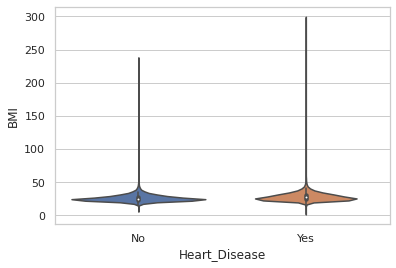

In [ ]:
sns.violinplot(x="Heart_Disease", y="BMI", data=df_Cardio_updated, size=8)
plt.show()

40
188
953
175
8
210


Text(0.5, 1.0, 'High extreme values in BMI')

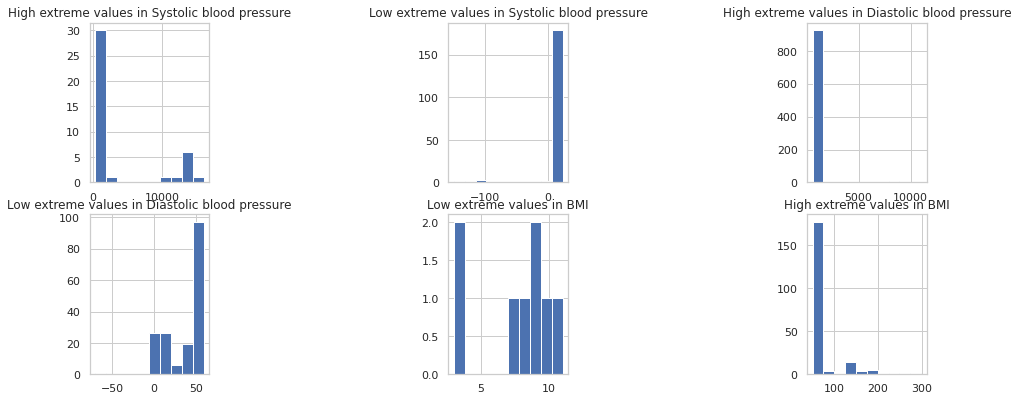

In [ ]:
# Outlier Detection from blood pressure
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=2)

plt.subplot(3, 3, 1)
plt.hist(df_Cardio_updated["ap_hi"][df_Cardio_updated["ap_hi"]>240])
print(count(df_Cardio_updated["ap_hi"][df_Cardio_updated["ap_hi"]>240]))
plt.title('High extreme values in Systolic blood pressure',loc='center')

plt.subplot(3, 3, 2)
plt.hist(df_Cardio_updated["ap_hi"][df_Cardio_updated["ap_hi"]<40])
print(count(df_Cardio_updated["ap_hi"][df_Cardio_updated["ap_hi"]<40]))
plt.title('Low extreme values in Systolic blood pressure',loc='center')

plt.subplot(3, 3, 3)
plt.hist(df_Cardio_updated["ap_lo"][df_Cardio_updated["ap_lo"]>190])
print(count(df_Cardio_updated["ap_lo"][df_Cardio_updated["ap_lo"]>190]))
plt.title('High extreme values in Diastolic blood pressure',loc='center')

plt.subplot(3, 3, 4)
plt.hist(df_Cardio_updated["ap_lo"][df_Cardio_updated["ap_lo"]<60])
print(count(df_Cardio_updated["ap_lo"][df_Cardio_updated["ap_lo"]<60]))
plt.title('Low extreme values in Diastolic blood pressure',loc='center')

plt.subplot(3, 3, 5)

# Outlier detection based on BMI 
plt.hist(df_Cardio_updated["BMI"][df_Cardio_updated["BMI"]<12])
print(count(df_Cardio_updated["BMI"][df_Cardio_updated["BMI"]<12]))
plt.title('Low extreme values in BMI',loc='center')

plt.subplot(3, 3, 6)
plt.hist(df_Cardio_updated["BMI"][df_Cardio_updated["BMI"]>50])
print(count(df_Cardio_updated["BMI"][df_Cardio_updated["BMI"]>50]))
plt.title('High extreme values in BMI',loc='center')

<p> After research about blood pressure range with respect to Diastolic and Systolic,the most extreme range for Systolic blood pressure for a human being is [40,240], for Diastolic blood pressure is [60,190]. At the same time, based on similar logic, the team restricts the BMI range in [12,50].

In [ ]:
# Filter out the outliers from the dataset 

df_Cardio_updated = df_Cardio_updated.loc[(df_Cardio_updated["ap_lo"]<190)&(df_Cardio_updated["ap_lo"]>60)&(df_Cardio_updated["ap_hi"]>40)&(df_Cardio_updated["ap_hi"]<240)&
                                          (df_Cardio_updated["BMI"]>12)&(df_Cardio_updated["BMI"]<50)]

df_Cardio_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65695 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         65695 non-null  object  
 1   height         65695 non-null  int64   
 2   weight         65695 non-null  float64 
 3   ap_hi          65695 non-null  int64   
 4   ap_lo          65695 non-null  int64   
 5   cholesterol    65695 non-null  object  
 6   gluc           65695 non-null  object  
 7   smoke          65695 non-null  object  
 8   Alcoholic      65695 non-null  object  
 9   active         65695 non-null  object  
 10  Heart_Disease  65695 non-null  object  
 11  Age_in_years   65695 non-null  int64   
 12  BMI            65695 non-null  int64   
 13  BMI_bining     65695 non-null  category
dtypes: category(1), float64(1), int64(5), object(7)
memory usage: 7.1+ MB


There were **4305** instances found within our dataset which were extreme for ap_hi, ap_lo and BMI. We removed them from our dataset.

## **Simple Statistic**:

Below is the simple statistics of the data. This helps us to get overall view of the data which could be used for our analysis.

**OBSERVATIONS**

1.   This dataset consists of only Middle Age to Old Adults. Which could be a proof of incomplete dataset because cardiovasicular disease can affect people at all ages (kids,teens,young adults) etc.

2.  The Systolic and Diastolic Blood Pressure is within medical approved limits since we removed the outliers.

"High Blood Pressure Symptoms and Causes"   Https_cdc, read://https_www.cdc.gov/?url=https%3A%2F%2Fwww.cdc.gov%2Fbloodpressure%2Fabout.htm. Accessed 15 May. 2022.



**Further analysis will be done on each attribute.**










In [ ]:
## summary statistics of the continuous variables

df_Cardio_updated.describe()

height        weight         ap_hi         ap_lo  Age_in_years  \
count  65695.000000  65695.000000  65695.000000  65695.000000  65695.000000   
mean     164.535368     74.292284    127.517239     82.292838     52.935246   
std        7.852678     13.890371     16.091525      8.690975      6.736611   
min      120.000000     28.000000     70.000000     61.000000     29.000000   
25%      159.000000     65.000000    120.000000     80.000000     48.000000   
50%      165.000000     72.000000    120.000000     80.000000     54.000000   
75%      170.000000     82.000000    140.000000     90.000000     58.000000   
max      250.000000    180.000000    230.000000    182.000000     64.000000   

                BMI  
count  65695.000000  
mean      26.989893  
std        5.052534  
min       13.000000  
25%       23.000000  
50%       26.000000  
75%       30.000000  
max       49.000000

In [ ]:
## What percentage of our dataset has heart disease?

Cardio_0 = float(len(df_Cardio_updated[df_Cardio_updated.Heart_Disease=='No']))/len(df_Cardio_updated)*100

print("Percentage of Patients who do not have the heart disease : " +str(Cardio_0) + "%")

Percentage of Patients who do not have the heart disease : 49.499961945353526%


In [ ]:
## What percentage of our dataset does not have heart disease?
Cardio_1 = float(len(df_Cardio_updated[df_Cardio_updated.Heart_Disease=='Yes']))/len(df_Cardio_updated)*100

print("Percentage of Patients who have the heart disease : " +str(Cardio_1) +"%")

Percentage of Patients who have the heart disease : 50.50003805464647%


In [ ]:
## Lets look at the dataset by Women
df_Cardio_updated[df_Cardio_updated.gender=="Female"].describe()

height        weight         ap_hi         ap_lo  Age_in_years  \
count  42456.000000  42456.000000  42456.000000  42456.000000  42456.000000   
mean     161.508738     72.645727    126.944931     81.955931     53.094380   
std        6.674844     13.649111     16.007725      8.620313      6.618708   
min      120.000000     30.000000     70.000000     61.000000     29.000000   
25%      157.000000     63.000000    120.000000     80.000000     49.000000   
50%      162.000000     70.000000    120.000000     80.000000     54.000000   
75%      166.000000     80.000000    140.000000     90.000000     58.000000   
max      250.000000    154.000000    230.000000    182.000000     64.000000   

                BMI  
count  42456.000000  
mean      27.425594  
std        5.387115  
min       13.000000  
25%       23.000000  
50%       26.000000  
75%       31.000000  
max       49.000000

<p>The mean height, weight, ap_hi, ap_lo, Age, and BMI were:
161.51 cm, 72.64 kg, 126.94, 81.96, 53, 27.42 respectively. We can see that the majority of our population for women, are middle age people with borderline high blood pressure and a BMI that's above normal.

In [ ]:
# Lets look at the dataset by Men

df_Cardio_updated[df_Cardio_updated.gender=="Male"].describe()

height        weight         ap_hi         ap_lo  Age_in_years  \
count  23239.000000  23239.000000  23239.000000  23239.000000  23239.000000   
mean     170.064805     77.300426    128.562804     82.908344     52.644520   
std        6.753974     13.823413     16.191696      8.785494      6.937571   
min      120.000000     28.000000     70.000000     61.000000     39.000000   
25%      166.000000     68.000000    120.000000     80.000000     47.000000   
50%      170.000000     75.000000    120.000000     80.000000     53.000000   
75%      175.000000     85.000000    140.000000     90.000000     58.000000   
max      207.000000    180.000000    220.000000    180.000000     64.000000   

                BMI  
count  23239.000000  
mean      26.193898  
std        4.262314  
min       13.000000  
25%       23.000000  
50%       25.000000  
75%       29.000000  
max       49.000000

<p>The mean height, weight, ap_hi, ap_lo, Age, and BMI were:
170.06 cm, 77.30 kg, 128.56, 82.90, 52, 26.19 respectively. We can see that the majority of our population for Men, are middle age people with an elavated blood pressure and a BMI that's above normal.


**Overall**, we can see that men are taller and weighed more in comparison to women. However, men had a higher ap_hi and ap_lo when compared to women. 







In [ ]:
## Checking to see if the any of the row is duplicated in the dataframe.
series=df_Cardio_updated.duplicated().any()
series
print("Duplicate Rows :")
duplicate = df_Cardio_updated[df_Cardio_updated.duplicated(keep='first')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate)

print(f"\nThere are {len(duplicate)} duplicated entries in the dataset!")


Duplicate Rows :
Duplicate Rows except first occurrence based on all columns are :
       gender  height  weight  ap_hi  ap_lo cholesterol    gluc smoke  \
id                                                                      
1176     Male     165    60.0    120     80      normal  normal    No   
1334     Male     175    89.0    120     80      normal  normal    No   
2622   Female     165    78.0    120     80      normal  normal    No   
2685   Female     160    58.0    120     80      normal  normal    No   
5522     Male     169    65.0    120     80      normal  normal    No   
...       ...     ...     ...    ...    ...         ...     ...   ...   
99842  Female     164    68.0    120     80      normal  normal    No   
99934  Female     158    55.0    110     70      normal  normal    No   
99974  Female     165    72.0    120     80      normal  normal    No   
99978    Male     180    78.0    120     80      normal  normal    No   
99993    Male     168    76.0    120     

3191 duplicates were identified in the dataset. As a team, we decided to remove the duplicates from the data in order to prevent overfitting on our future model. It's best that the model has a great representation of variety data in order to predict better what the true population dataset is like.

We are uncertain of the source of the data and the method used to gather the data. Therefore, we don't know how much of a true representation of the population this dataset provided.

In [ ]:
## Remove the duplicates.

df_Cardio_updated=df_Cardio_updated.drop_duplicates()

In [ ]:
df_Cardio_updated.describe()

height        weight         ap_hi         ap_lo  Age_in_years  \
count  62504.000000  62504.000000  62504.000000  62504.000000  62504.000000   
mean     164.524798     74.630065    127.885175     82.423317     52.959219   
std        7.971974     14.066755     16.369932      8.858819      6.774762   
min      120.000000     28.000000     70.000000     61.000000     29.000000   
25%      159.000000     65.000000    120.000000     80.000000     48.000000   
50%      165.000000     73.000000    120.000000     80.000000     54.000000   
75%      170.000000     83.000000    140.000000     90.000000     58.000000   
max      250.000000    180.000000    230.000000    182.000000     64.000000   

                BMI  
count  62504.000000  
mean      27.120856  
std        5.114614  
min       13.000000  
25%       23.000000  
50%       26.000000  
75%       30.000000  
max       49.000000

After removing the duplicates, we saw that our summary statistics had not changed. Therefore, we'll proceed with using the dataset without the duplicates instances included.

# **Visualize Attributes**


Yes    32391
No     30113
Name: Heart_Disease, dtype: int64


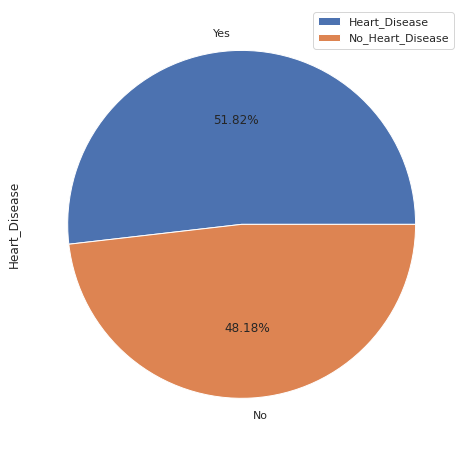

In [ ]:
## Population summarize

print(df_Cardio_updated['Heart_Disease'].value_counts())
df_Cardio_updated['Heart_Disease'].value_counts().plot(kind='pie',figsize=(15,8), autopct='%.2f%%')
plt.legend(['Heart_Disease','No_Heart_Disease'])



Female    39942
Male      22562
Name: gender, dtype: int64


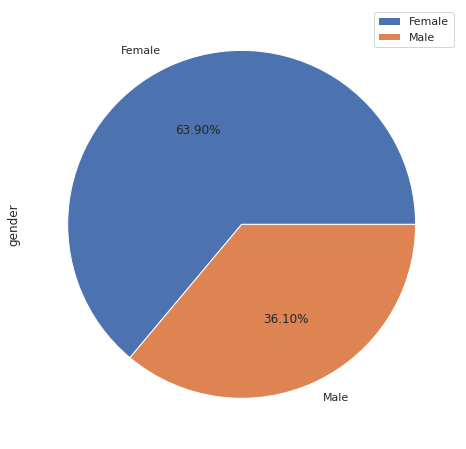

In [ ]:
print(df_Cardio_updated['gender'].value_counts())
df_Cardio_updated
df_Cardio_updated['gender'].value_counts().plot(kind='pie',figsize=(15,8), autopct='%.2f%%')
plt.legend(['Female','Male'])

It is important to note that the dataset contained **22,562** Males and **39942** Females. Females almost doubled the population of Males within the dataset. This makes our dataset unbalanced. We'll be careful of the inferences drawn based on this observation.

Heart_Disease     No    Yes
gender                     
Female         19148  20794
Male           10965  11597


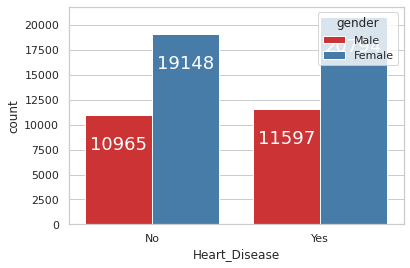

In [ ]:
## Heart Disease with Gender perspective.

print(pd.crosstab(df_Cardio_updated.gender,df_Cardio_updated.Heart_Disease))

## Now Plotting the count - in a count plot as we can see more women are prone to get heart disease.

ax=sns.countplot(x='Heart_Disease',data=df_Cardio_updated,hue='gender',palette='Set1')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)


# **Univariate Analysis of Categorical Variables**

In [ ]:
print("-----------------------------Glucose-Overall-Count---------------------------------")
res1 = pd.crosstab(df_Cardio_updated.gluc	,df_Cardio_updated.Heart_Disease)
print(res1.sum(axis=1))

print("-----------------------------Gender-Overall-Count---------------------------------")
res1 = pd.crosstab(df_Cardio_updated.gender	,df_Cardio_updated.Heart_Disease)
print(res1.sum(axis=1))

print("-----------------------------cholesterol--Overall-Count----------------------------------")
res2 = pd.crosstab(df_Cardio_updated.cholesterol	,df_Cardio_updated.Heart_Disease)
print(res2.sum(axis=1))

print("-----------------------------active--Overall-Count----------------------------------")
res3= pd.crosstab(df_Cardio_updated.active	,df_Cardio_updated.Heart_Disease)
print(res3.sum(axis=1))

print("-----------------------------Alcoholic-Overall-Count----------------------------------")
res4 = pd.crosstab(df_Cardio_updated.Alcoholic	,df_Cardio_updated.Heart_Disease)
print(res4.sum(axis=1))


print("-----------------------------smoke--Overall-Count----------------------------------")
res5 = pd.crosstab(df_Cardio_updated.smoke	,df_Cardio_updated.Heart_Disease)
print(res5.sum(axis=1))


print("-----------------------------BMI_bining--Overall-Count----------------------------------")

res6 = pd.crosstab(df_Cardio_updated.BMI_bining ,df_Cardio_updated.Heart_Disease)
print(res6.sum(axis=1))




-----------------------------Glucose-Overall-Count---------------------------------
gluc
above normal          4842
normal               52633
well above normal     5029
dtype: int64
-----------------------------Gender-Overall-Count---------------------------------
gender
Female    39942
Male      22562
dtype: int64
-----------------------------cholesterol--Overall-Count----------------------------------
cholesterol
above normal          8851
normal               45998
well above normal     7655
dtype: int64
-----------------------------active--Overall-Count----------------------------------
active
No     12636
Yes    49868
dtype: int64
-----------------------------Alcoholic-Overall-Count----------------------------------
Alcoholic
No     58955
Yes     3549
dtype: int64
-----------------------------smoke--Overall-Count----------------------------------
smoke
No     56706
Yes     5798
dtype: int64
-----------------------------BMI_bining--Overall-Count----------------------------------
B

We can see that a majority of the population is made up of Female, non alcoholic,  non smokers, above normal weight, and  normal cholesterol values.

In [ ]:
## Count using Cross tab Function with reference to Heart Disease.


print ("-----------------------Cholestrol- Heart Disease------------------------------------------")

print(pd.crosstab(df_Cardio_updated.cholesterol	,df_Cardio_updated.Heart_Disease))


print ("-----------------------Glucose- Heart Disease------------------------------------------")
print(pd.crosstab(df_Cardio_updated.gluc	,df_Cardio_updated.Heart_Disease))


print ("-----------------------Physical Activity- Heart Disease------------------------------------------")
print(pd.crosstab(df_Cardio_updated.active	,df_Cardio_updated.Heart_Disease))


print ("-----------------------Smoke- Heart Disease------------------------------------------")
print(pd.crosstab(df_Cardio_updated.smoke	,df_Cardio_updated.Heart_Disease))


print ("-----------------------BMI- Heart Disease------------------------------------------")
print(pd.crosstab(df_Cardio_updated.BMI_bining	,df_Cardio_updated.Heart_Disease))


print ("-----------------------Alcoholic- Heart Disease------------------------------------------")
print(pd.crosstab(df_Cardio_updated.Alcoholic	,df_Cardio_updated.Heart_Disease))




-----------------------Cholestrol- Heart Disease------------------------------------------
Heart_Disease         No    Yes
cholesterol                    
above normal        3464   5387
normal             24862  21136
well above normal   1787   5868
-----------------------Glucose- Heart Disease------------------------------------------
Heart_Disease         No    Yes
gluc                           
above normal        1952   2890
normal             26270  26363
well above normal   1891   3138
-----------------------Physical Activity- Heart Disease------------------------------------------
Heart_Disease     No    Yes
active                     
No              5728   6908
Yes            24385  25483
-----------------------Smoke- Heart Disease------------------------------------------
Heart_Disease     No    Yes
smoke                      
No             27097  29609
Yes             3016   2782
-----------------------BMI- Heart Disease------------------------------------------
Heart_Dis

Cross tab calculation to view the dataset by Heart Disease. We're noticing several key points here that we'll evaluate further in the notebook.

* For Cholesterol, instances that are categorized as "well above normal" have more values with Heart Disease than don't.
* For Glucose, instances that are categorized as "well above normal" have more values with Heart Disease than don't.
* For BMI, instances that are categorized as "Obese" have more values with Heart Disease than don't.






However, for instances in the normal range, for attributes: Cholesterol, Glucose,  BMI, were displaying close to 50/50 split with Heart Disease. This tells us that there are other contributes variables for Heart Disease that doesn't exist in this dataset.



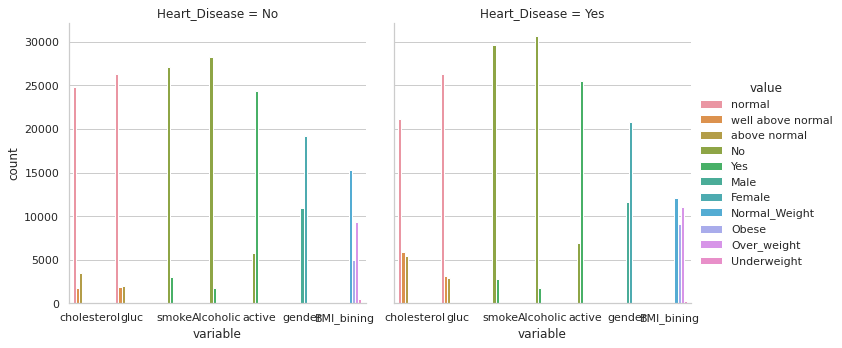

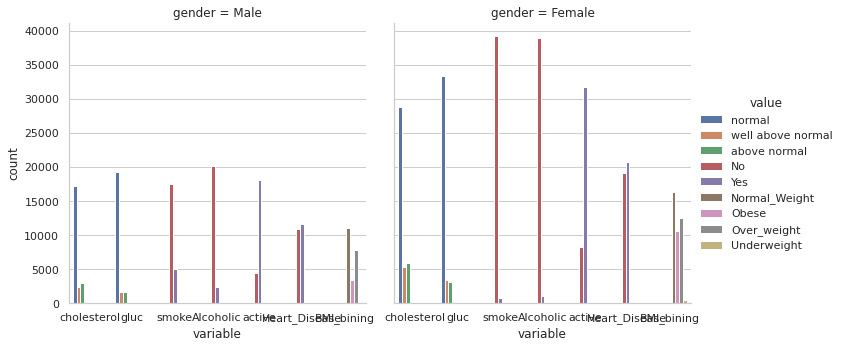

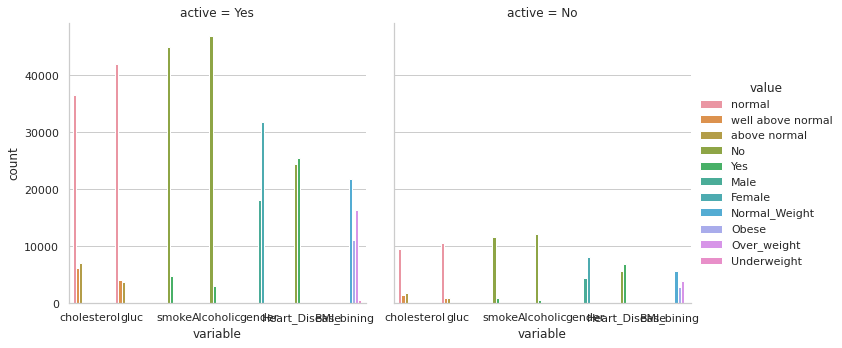

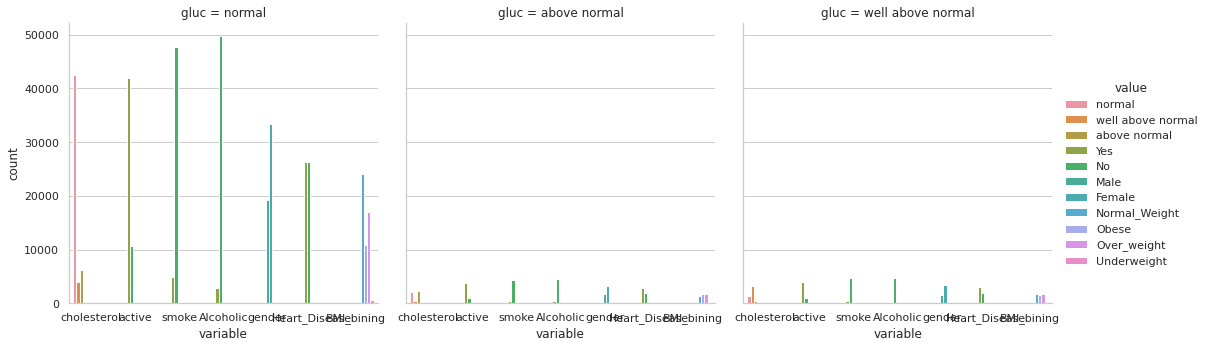

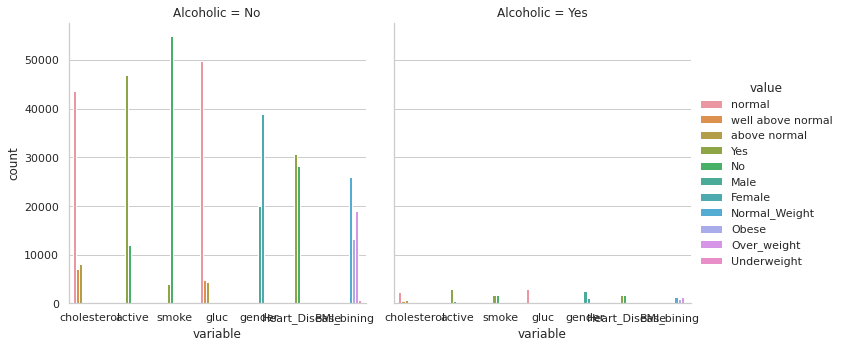

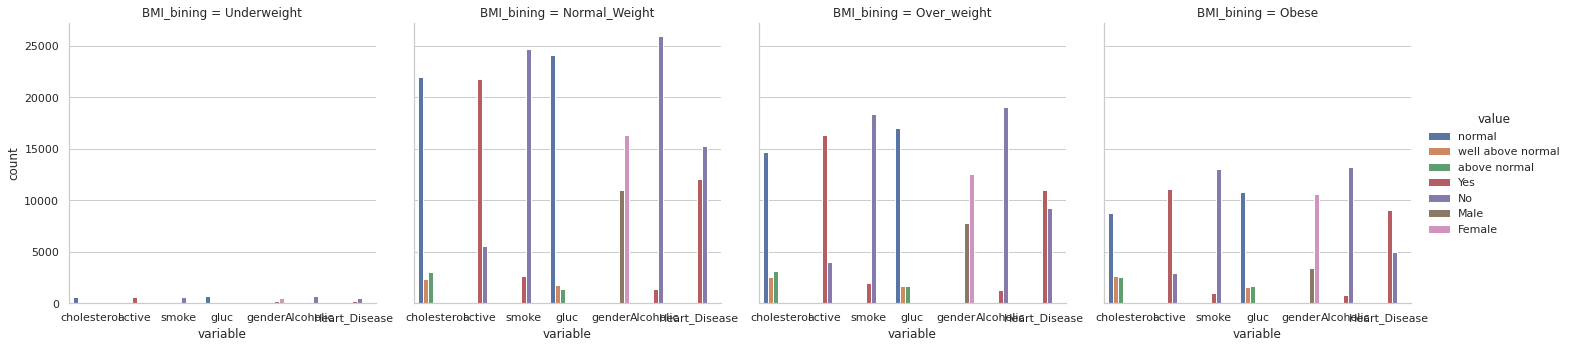

In [ ]:
df = pd.melt(df_Cardio_updated, id_vars=['Heart_Disease'], value_vars=['cholesterol','gluc', 'smoke', 'Alcoholic', 'active','gender','BMI_bining'])

sns.catplot(x="variable", hue="value", col="Heart_Disease",
                data=df, kind="count");

df_gen = pd.melt(df_Cardio_updated, id_vars=['gender'], value_vars=['cholesterol','gluc', 'smoke', 'Alcoholic', 'active','Heart_Disease','BMI_bining'])
sns.catplot(x="variable", hue="value", col="gender",
                data=df_gen, kind="count");

df_active = pd.melt(df_Cardio_updated, id_vars=['active'], value_vars=['cholesterol','gluc', 'smoke', 'Alcoholic', 'gender','Heart_Disease','BMI_bining'])
sns.catplot(x="variable", hue="value", col="active",
                data=df_active, kind="count");

df_gluc = pd.melt(df_Cardio_updated, id_vars=['gluc'], value_vars=['cholesterol','active', 'smoke', 'Alcoholic', 'gender','Heart_Disease','BMI_bining'])
sns.catplot(x="variable", hue="value", col="gluc",
                data=df_gluc, kind="count");

df_alco= pd.melt(df_Cardio_updated, id_vars=['Alcoholic'], value_vars=['cholesterol','active', 'smoke', 'gluc', 'gender','Heart_Disease','BMI_bining'])
sns.catplot(x="variable", hue="value", col="Alcoholic",
                data=df_alco, kind="count");


df_BMI= pd.melt(df_Cardio_updated, id_vars=['BMI_bining'], value_vars=['cholesterol','active', 'smoke', 'gluc', 'gender','Alcoholic','Heart_Disease'])
sns.catplot(x="variable", hue="value", col="BMI_bining",data=df_BMI, kind="count");

#### OBSERVATION:


Based on the above count plots of the categorical data we are able to see the comprehensive view on the dataset.
1.   Patients with cardiovascular disease are mostly have a Well above normal Cholestrol and High BMI (Overweight and Obese). More females seem to getting cardiovascular disease when compared to males. Other factors like Glucose level, Lifestyle choices or Alcohol intake does not seem to have any impact.
2.  More male smoke compared to female. The count of female have higher cholestrol levels when compared with male.Also an interesting observation is that females are more active than males.

3. Our data set contains less patients with high alcohol intake and smokers this could be the way the data was collected .



## **Univariate Analysis of Continous Features**

Here we have analyzed the continous Features in our dataset.

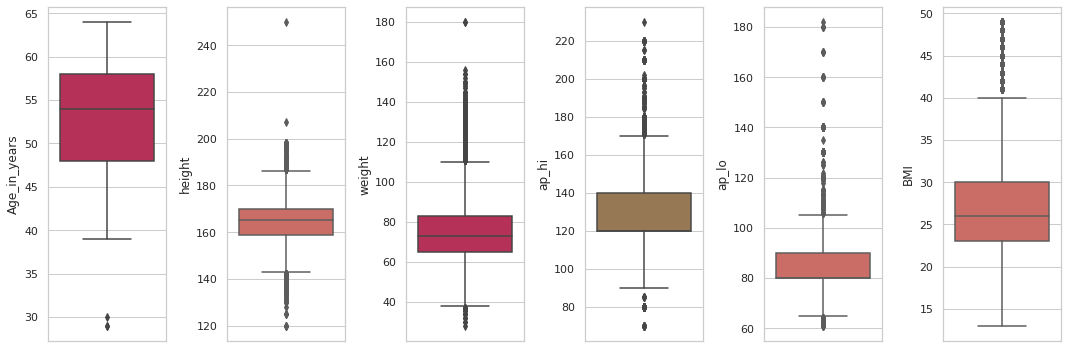

In [ ]:
## Continous Variables analysis 
fig, axes = plt.subplots(1,6, figsize=(15, 5))
sns.boxplot(data=df_Cardio_updated, y='Age_in_years', ax=axes[0], palette="rocket")
sns.boxplot(data=df_Cardio_updated, y='height', ax=axes[1], palette="hls")
sns.boxplot(data=df_Cardio_updated, y='weight', ax=axes[2], palette="rocket")
sns.boxplot(data=df_Cardio_updated, y='ap_hi', ax=axes[3], palette="cubehelix")
sns.boxplot(data=df_Cardio_updated, y='ap_lo', ax=axes[4], palette="hls")
sns.boxplot(data=df_Cardio_updated, y='BMI', ax=axes[5], palette="hls")
plt.tight_layout()

#### OBSERVATION:
From the graph above we see that ap_hi, ap_lo, BMI, and weight are heavily right skewed.

Age in Years is approximately normal.

The BMI boxplot shows that roughly 50% of the dataset contains instances above normal weight (Overweight, Obese).

## **Bivariate Analysis of Continous Features**

### Age vs Heart Disease

Here we have analysed Age versus the other Heart Disease with Respect to the other Features

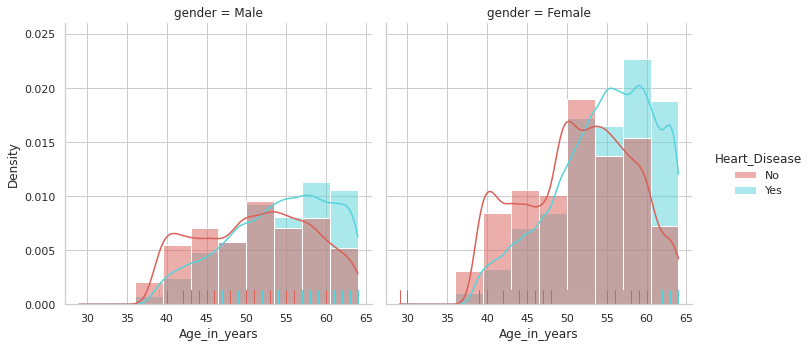

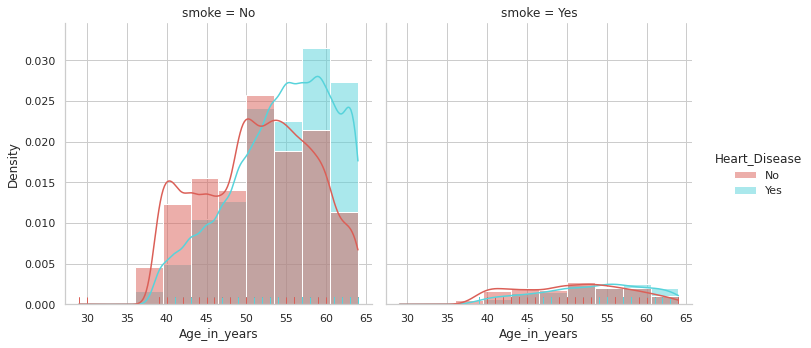

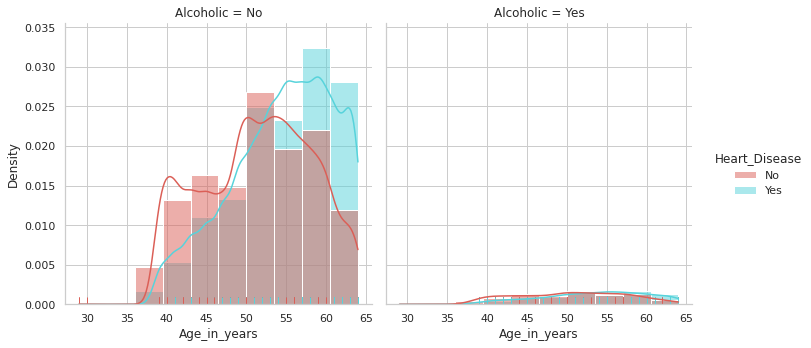

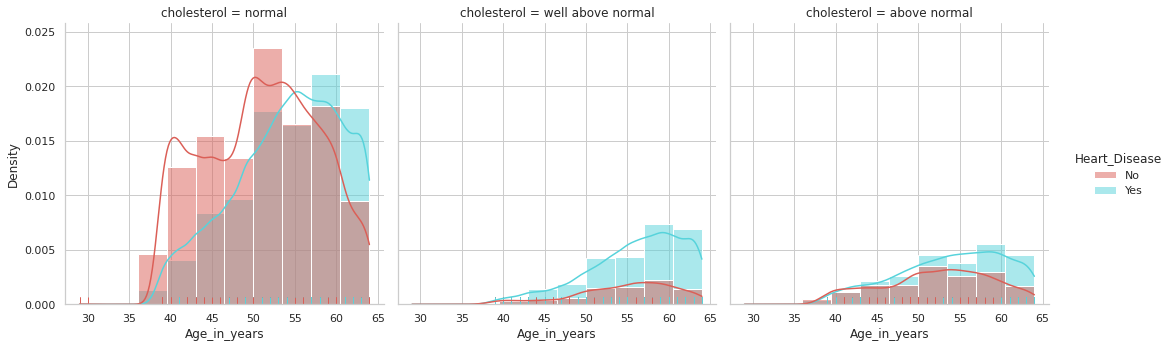

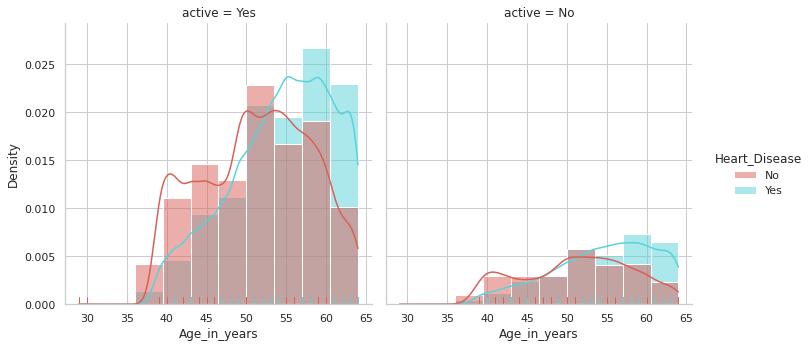

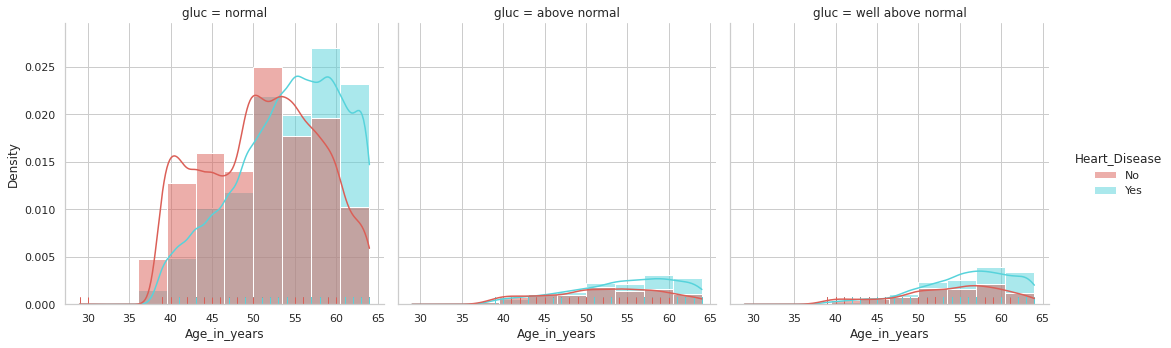

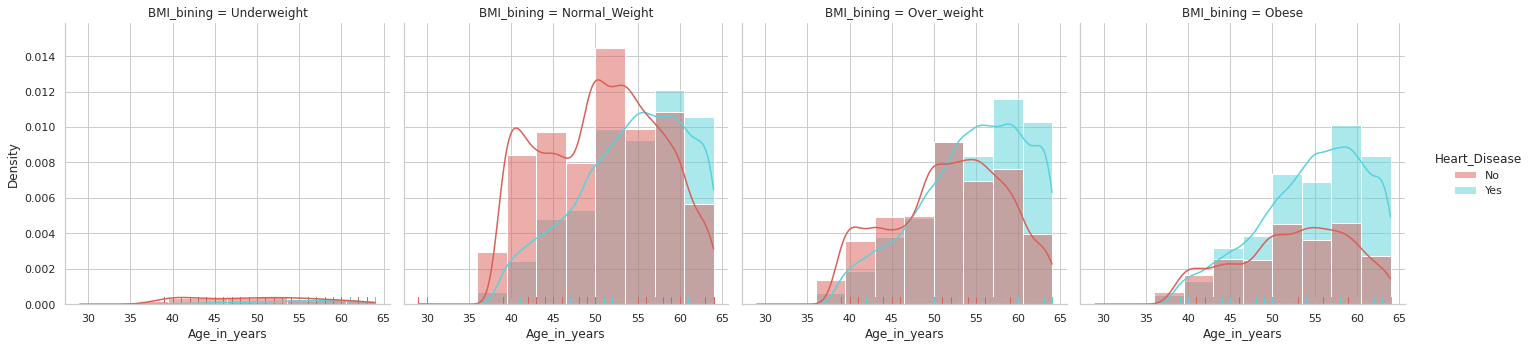

In [ ]:
##Age in Years vs the Heart Disease 
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gender",rug=True,rug_kws={'height':0.05},palette="hls")
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="smoke",rug=True,palette="hls")
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="Alcoholic",rug=True,palette="hls")
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="cholesterol",rug=True,palette="hls")
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="active",rug=True,palette="hls")
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gluc",rug=True,palette="hls")
sns.displot(df_Cardio_updated,x="Age_in_years",hue="Heart_Disease",bins=10,kde=True,stat="density",col="BMI_bining",rug=True,palette="hls")





#### **OBSERVATION:**

1. The density curve of Age and  the probabilty of getting Heart Disease is right skewed  meaning in both male and female the chances of getting Heart Disease increases with age. People between the ages of 50-65 had Heart Disease. More seen in female than in male then again our data is unbalanced because there are more female compared to male.
2. Mostly 90% of our data consists of Non Smokers and Non Alcoholics. Even then the probabilty of getting Heart Disease increases with age. Again chart is right skewed. 
3. The Density curves of Cholestrol, and Glucose with Age all are right skewed which indicates the probability of getting Heart Disease increases with Age.
4. The Density curve of BMI and Age is right skewed and an interesting fact is we can see that the probabilty of cardiovascular disease increases drasticaly between 50 to 55 for overweight and Obese people.

To conclude Age can be an important attribute because based on the below visuals we can see no matter gender or if a person smokes or is an alcoholic or glucose levels or the lifestyle does not impact the fact that the probability of getting Heart Disease increases with Age.

### **Systolic Blood Pressure (ap_hi) vs Heart Disease**

Here we have analysed Systolic Blood Pressure versus the other Heart Disease with Respect to the other Features


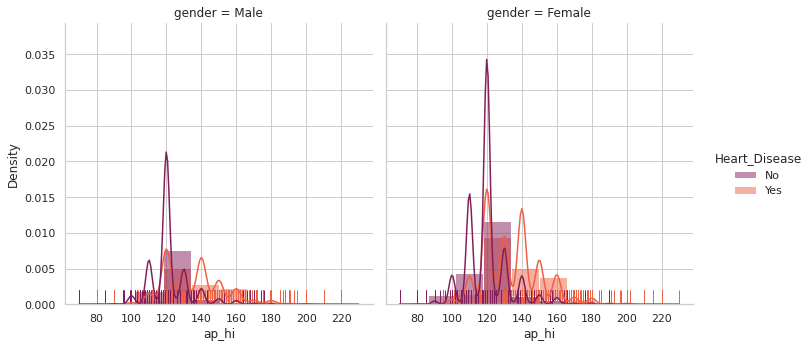

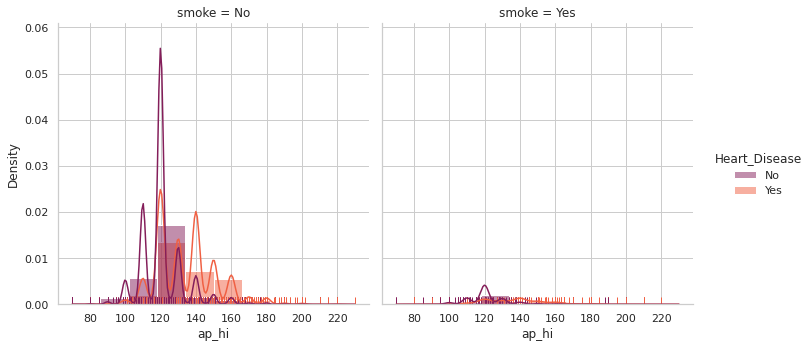

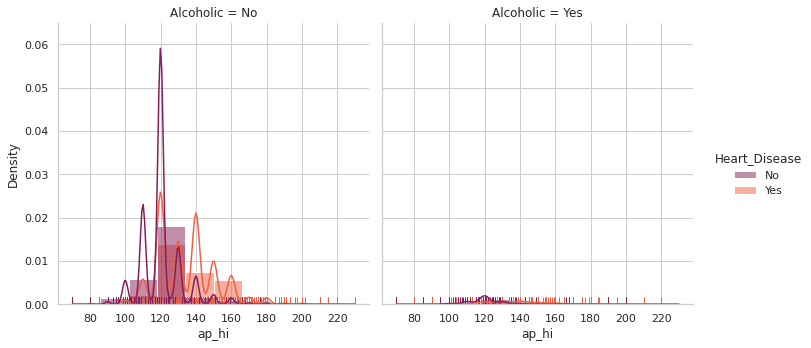

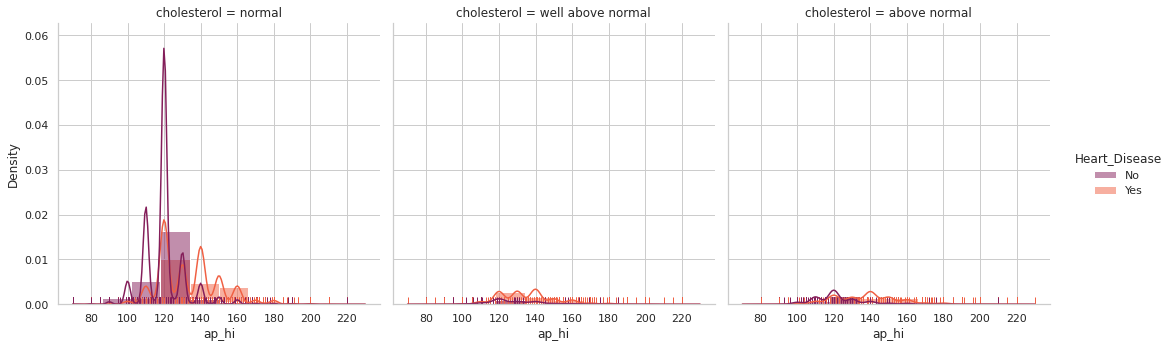

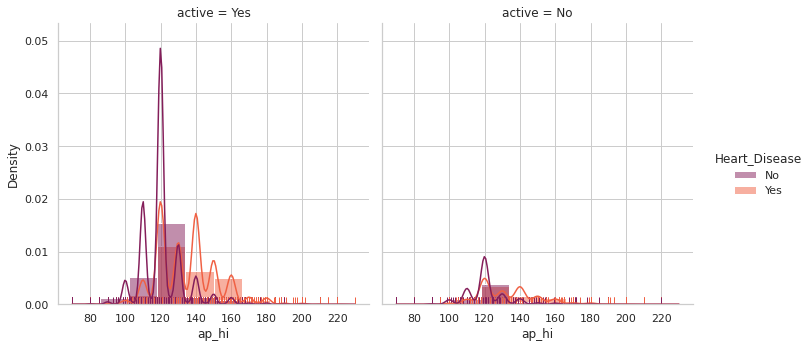

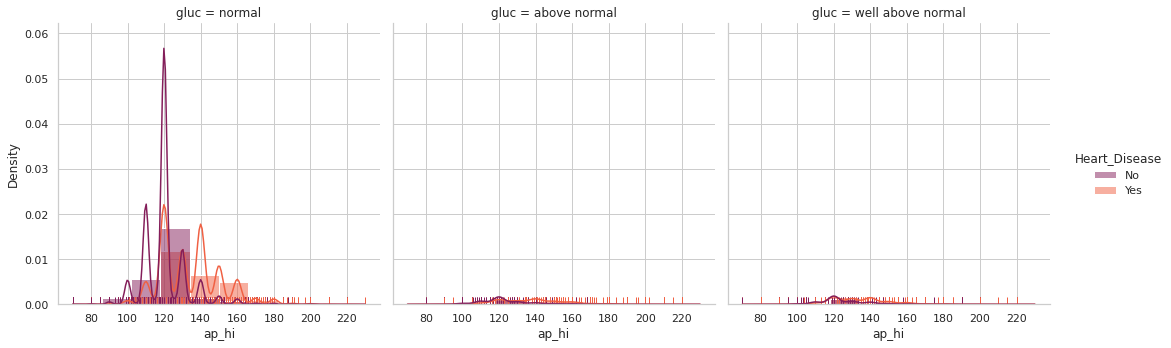

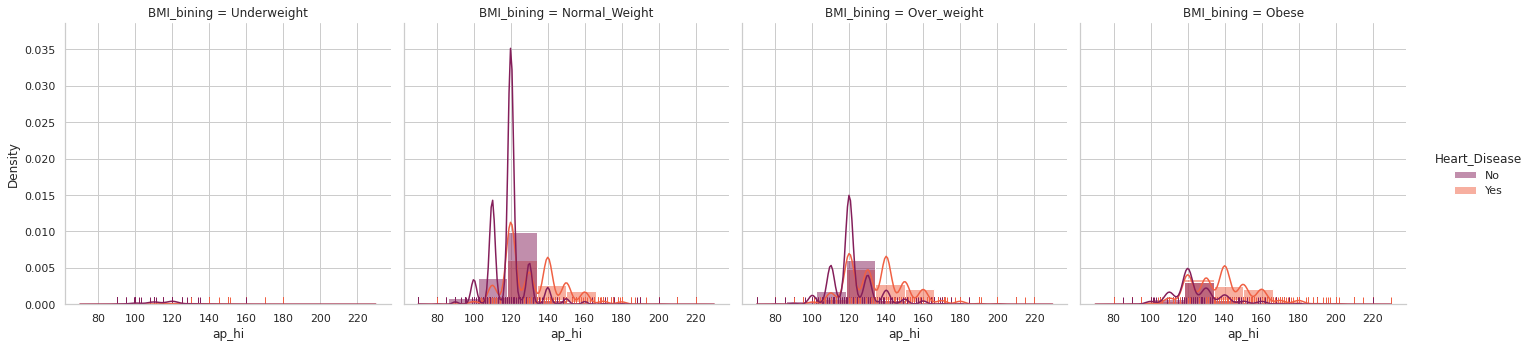

In [ ]:

## Ap_hi (Systolic Pressure vs Heart Disease)
sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gender",rug=True,rug_kws={'height':0.05},palette="rocket")
sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="smoke",rug=True,palette="rocket")
sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="Alcoholic",rug=True,palette="rocket")
sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="cholesterol",rug=True,palette="rocket")
sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="active",rug=True,palette="rocket")
sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gluc",rug=True,palette="rocket")

sns.displot(df_Cardio_updated,x="ap_hi",hue="Heart_Disease",bins=10,kde=True,stat="density",col="BMI_bining",rug=True,palette="rocket")

#### **OBSERVATION**
Upon analysis of the above graphs we can see some interesting observations.


1.   Cardiovascular disease is more seen in both females and males who have Systolic blood pressure between 140 to 180.
 

Similar to Age this indicates that no matter the gender or the lifestyle habbits of the patient ( smoking,exercise habbits or alcohol  intake or glucose levels) the probabilty of getting Heart Disease increases if the blood pressure is between 140 to 180.




### BMI vs Heart Disease

Here we have analysed BMI versus  Heart Disease with Respect to the other Features

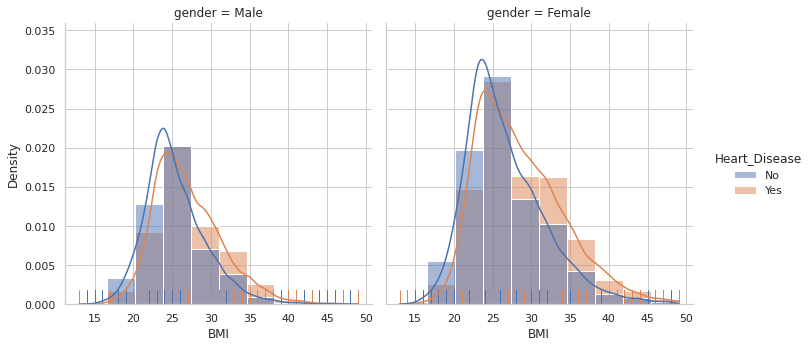

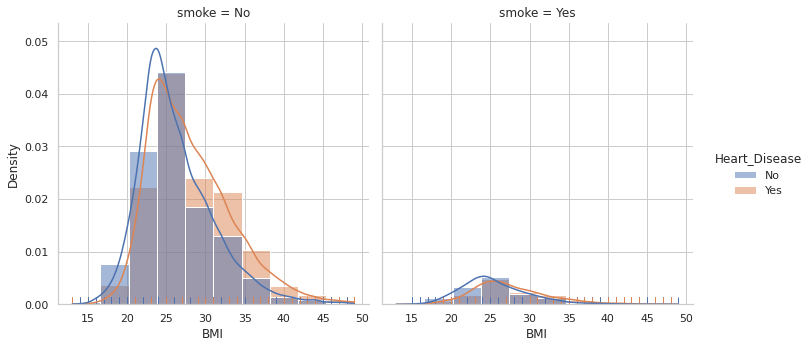

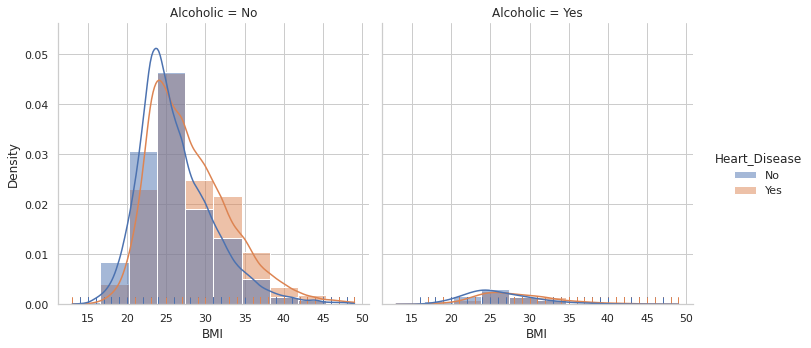

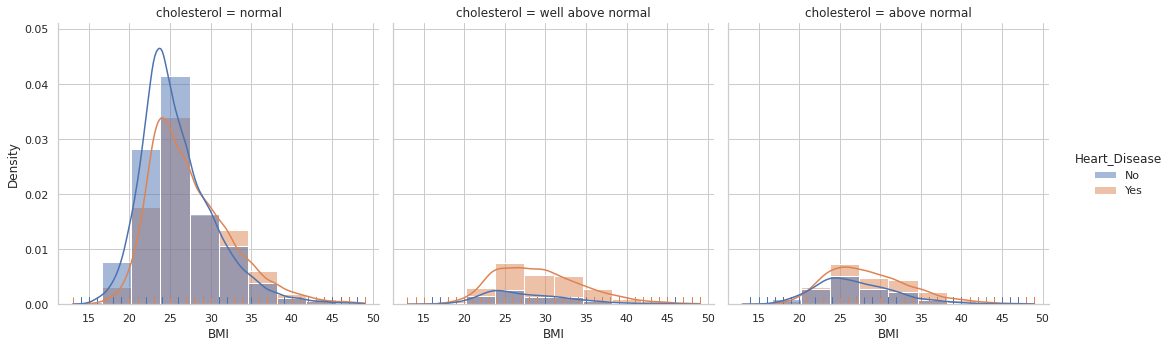

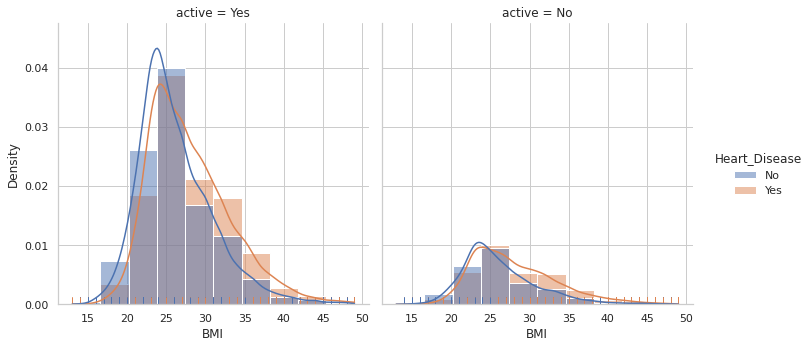

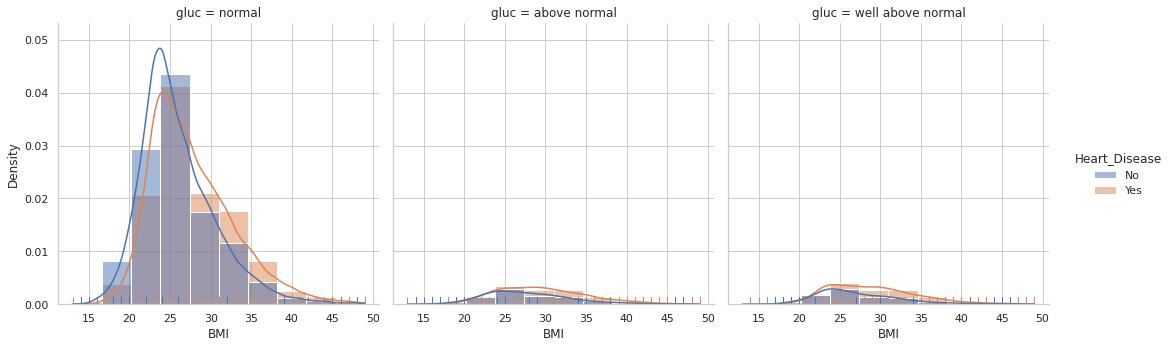

In [ ]:
## BMI vs the Heart Disease.

sns.displot(df_Cardio_updated,x="BMI",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gender",rug=True,rug_kws={'height':0.05})
sns.displot(df_Cardio_updated,x="BMI",hue="Heart_Disease",bins=10,kde=True,stat="density",col="smoke",rug=True)
sns.displot(df_Cardio_updated,x="BMI",hue="Heart_Disease",bins=10,kde=True,stat="density",col="Alcoholic",rug=True)
sns.displot(df_Cardio_updated,x="BMI",hue="Heart_Disease",bins=10,kde=True,stat="density",col="cholesterol",rug=True)
sns.displot(df_Cardio_updated,x="BMI",hue="Heart_Disease",bins=10,kde=True,stat="density",col="active",rug=True)
sns.displot(df_Cardio_updated,x="BMI",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gluc",rug=True)

#### **OBSERVATION:**
Upon analysis of the above graphs we can see some interesting observations.

1. Cardiovascular disease is more seen in both woman and men who have BMI above 25. Which means the probability of getting cardiovascular disease increases for Obese patients.

2. This  would indicate that no matter the gender or the lifestyle habbits of the patient ( smoking,exercise habbits or alcohol intake or glucose levels) the probabilty of getting Heart Disease increases if the BMI above 35.


### **Diastolic Blood Pressure vs Heart Disease**


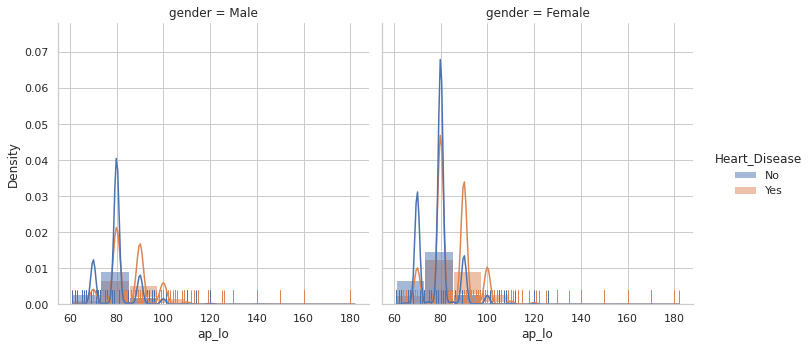

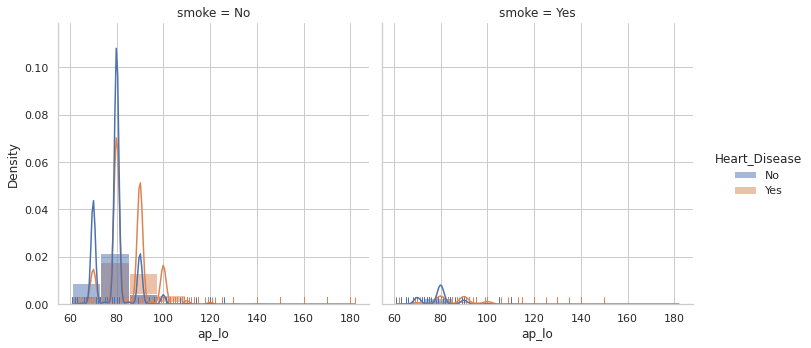

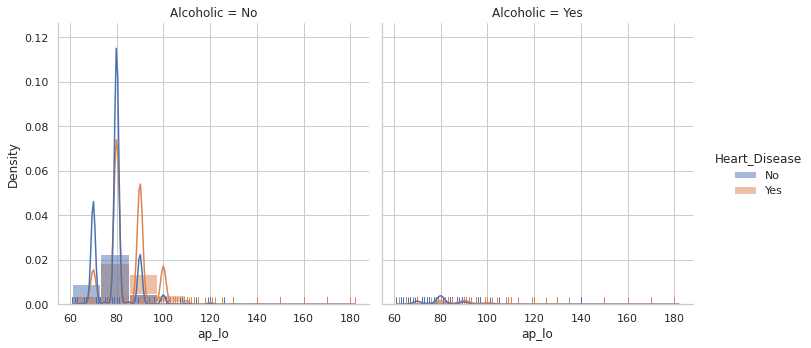

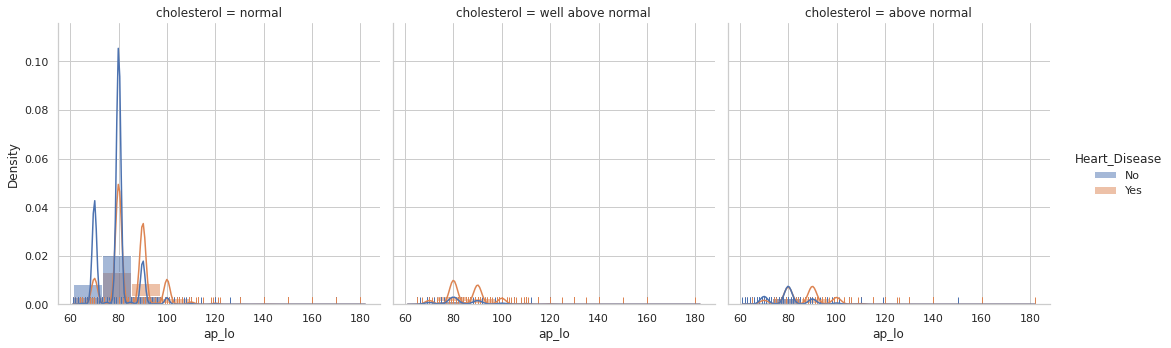

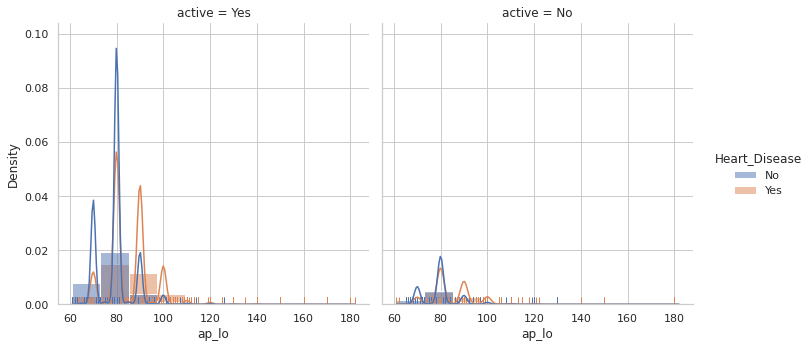

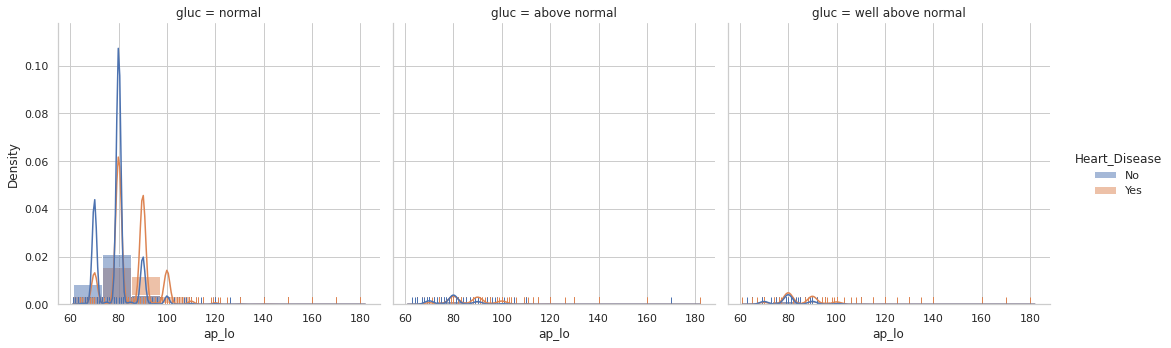

In [ ]:

sns.displot(df_Cardio_updated,x="ap_lo",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gender",rug=True,rug_kws={'height':0.05})
sns.displot(df_Cardio_updated,x="ap_lo",hue="Heart_Disease",bins=10,kde=True,stat="density",col="smoke",rug=True)
sns.displot(df_Cardio_updated,x="ap_lo",hue="Heart_Disease",bins=10,kde=True,stat="density",col="Alcoholic",rug=True)
sns.displot(df_Cardio_updated,x="ap_lo",hue="Heart_Disease",bins=10,kde=True,stat="density",col="cholesterol",rug=True)
sns.displot(df_Cardio_updated,x="ap_lo",hue="Heart_Disease",bins=10,kde=True,stat="density",col="active",rug=True)
sns.displot(df_Cardio_updated,x="ap_lo",hue="Heart_Disease",bins=10,kde=True,stat="density",col="gluc",rug=True)

#### **OBSERVATION**
Upon analysis of the above graphs we can see some interesting observations.


1.   Cardiovascular disease is more seen in both females and males who have Diastolic blood pressure above 85.
 

Similar to Age this indicates that no matter the gender or the lifestyle habits of the patient ( smoking,exercise habbits or alcohol  intake or glucose levels) the probabilty of getting Heart Disease increases if the blood pressure is above 85.

# JOINT ANALYSIS 

### **CORRELATION PLOT**

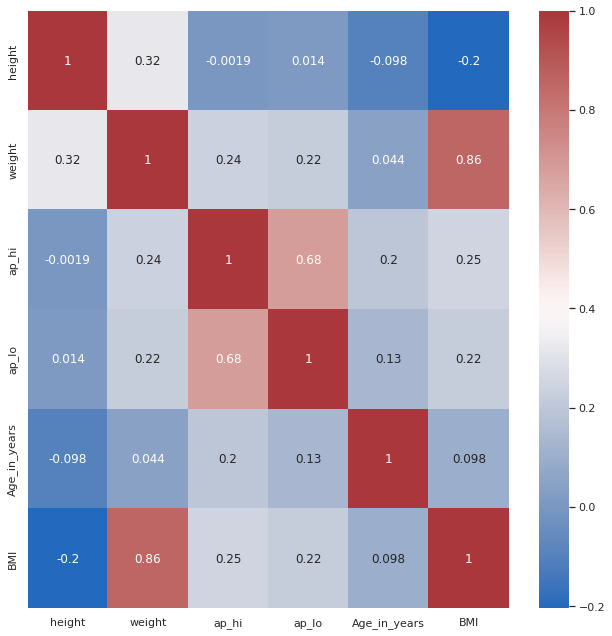

In [ ]:
# plot the correlation matrix using seaborn
cmap = sns.color_palette("vlag", as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_Cardio_updated.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### **OBSERVATION:**
Few things stands out from this plot:
1. Height and Weight are correlated at 0.32%
2. ap_hi and ap_lo are correlated at 0.68%
3. BMI is correlated with Weight at 0.86% and negatively correlated with Height at -0.2%
3. Both ap_lo and ap_hi are correlated to weight.

###**PAIRPLOT ANALYSIS**

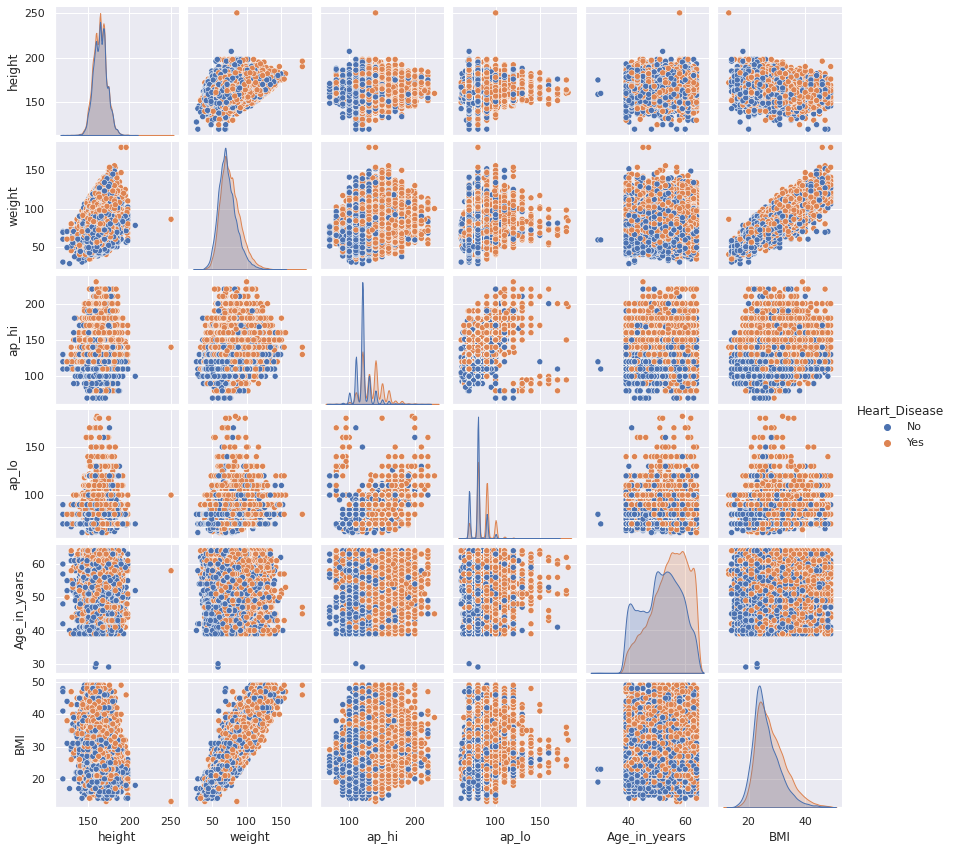

In [ ]:
%matplotlib inline
sns.pairplot(df_Cardio_updated, hue="Heart_Disease", height=2)

#### **OBSERVATION:**
This graph confirms the observations made from the heatmap:

1. Height and Weight are correlated at 0.32%
2. ap_hi and ap_lo are correlated at 0.68%
3. BMI is correlated with Weight at 0.86% and negatively correlated with Height at -0.2%
3. Both ap_lo and ap_hi are correlated to weight.


We observe that the dataset doesn't lend itself to classification as we cannot see any patterns of clustering. We will explore PCA and LDA to see if we reduce the dimensionality and increase its chances of being classified.

## ANALYSING DIFFERENT ATTRIBUTES
Cholesterol vs Heart Diesease

This is some of the analysis we did to find attributes that can predict Heart Disease.


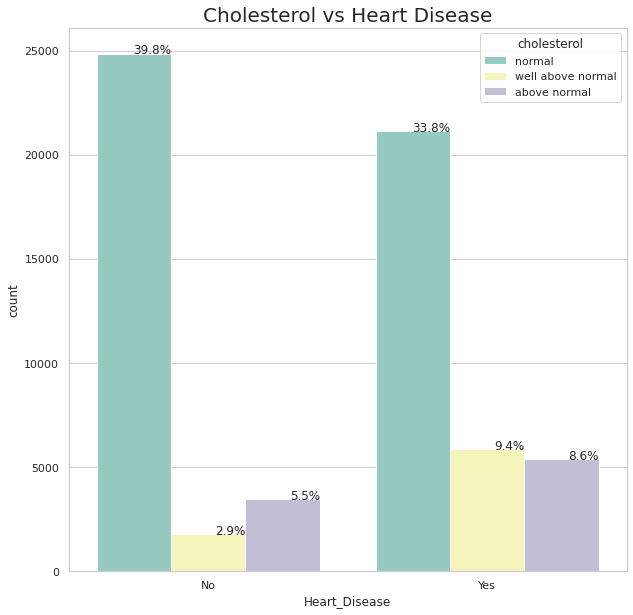

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
total = float(len(df_Cardio_updated))
ax = sns.countplot(x="Heart_Disease", hue="cholesterol", data=df_Cardio_updated,palette='Set3')
plt.title('Cholesterol vs Heart Disease', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Smoking vs Heart Disease

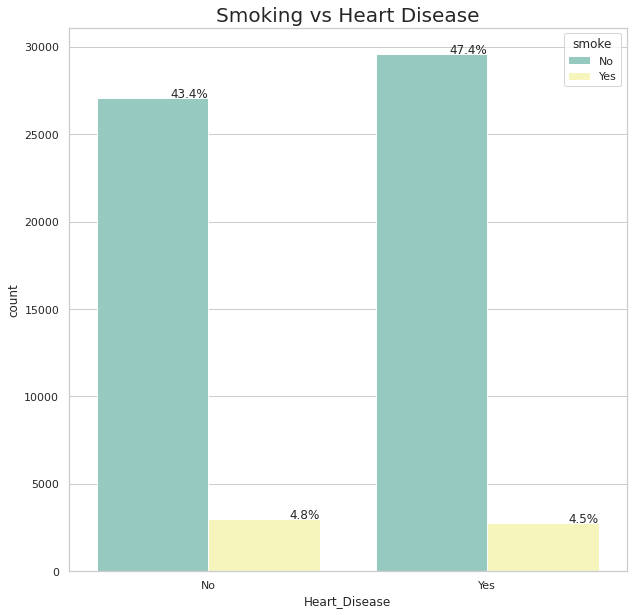

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
total = float(len(df_Cardio_updated))
ax = sns.countplot(x="Heart_Disease", hue="smoke", data=df_Cardio_updated,palette='Set3')
plt.title('Smoking vs Heart Disease', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

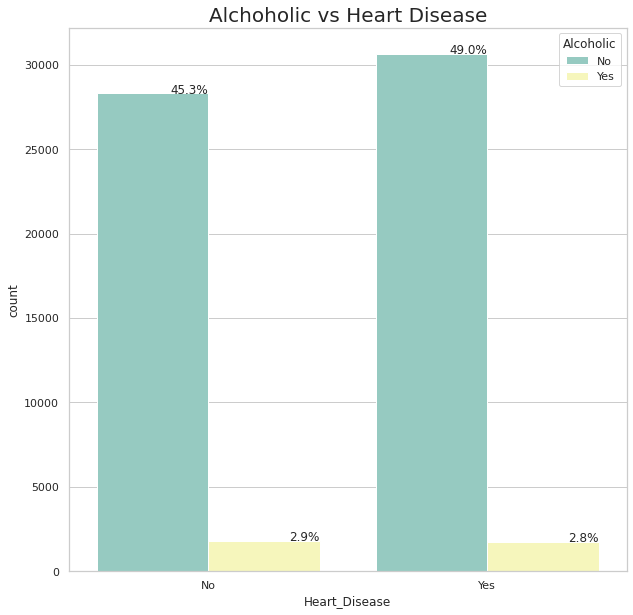

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
total = float(len(df_Cardio_updated))
ax = sns.countplot(x="Heart_Disease", hue="Alcoholic", data=df_Cardio_updated,palette='Set3')
plt.title('Alchoholic vs Heart Disease', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

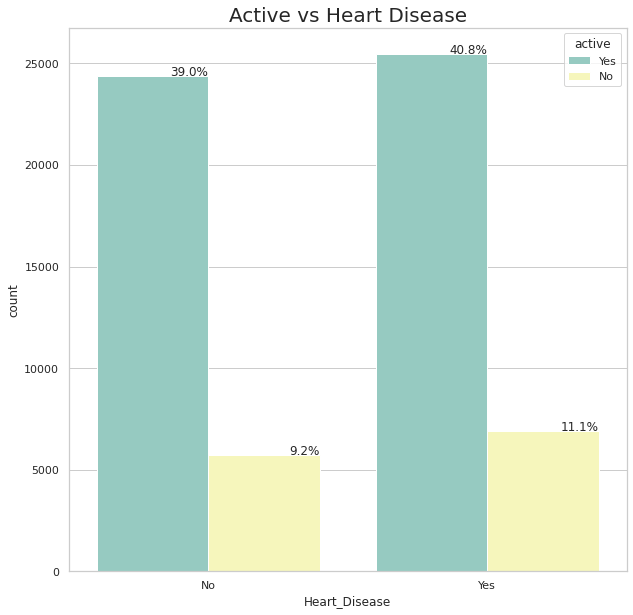

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
total = float(len(df_Cardio_updated))
ax = sns.countplot(x="Heart_Disease", hue="active", data=df_Cardio_updated,palette='Set3')
plt.title('Active vs Heart Disease', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()


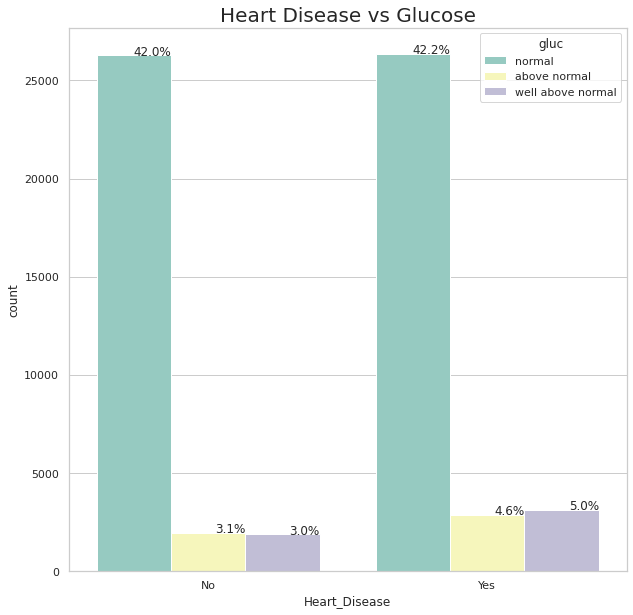

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
total = float(len(df_Cardio_updated))
ax = sns.countplot(x="Heart_Disease", hue="gluc", data=df_Cardio_updated,palette='Set3')
plt.title('Heart Disease vs Glucose', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

#### **OBSERVATION:**
From the set of visuals where we have explored the relationship between the Categorical attributes and Heart Disease. We can say that the attributes Alcohol, and Smoking, do not contribute to Heart Disease.

On the other hand, Cholesterol and Glucose can be used to determine Heart Disease because of their correlation.


## **JOINT PLOT**

<Figure size 432x288 with 0 Axes>

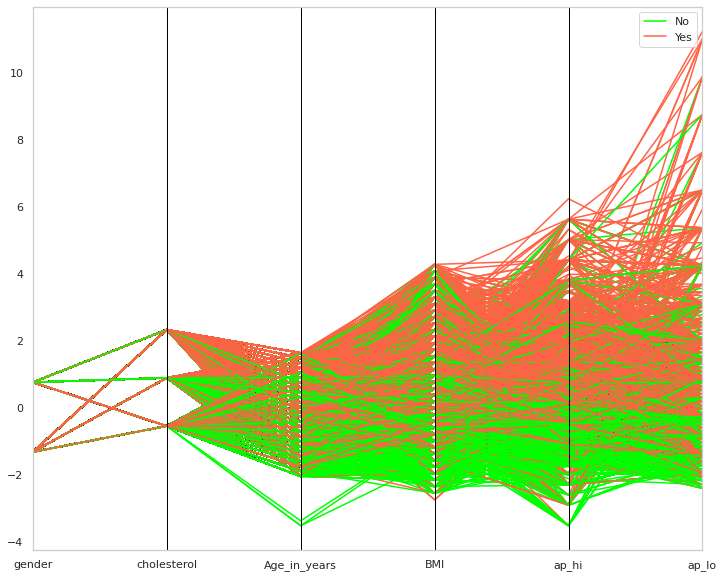

<Figure size 432x288 with 0 Axes>

In [ ]:
df_sub = df_Cardio_updated[['Age_in_years', 'ap_hi', 'ap_lo', 'BMI','Heart_Disease', 'gender', 'cholesterol']]
df_sub['gender'] = df_sub['gender'].replace(('Female', 'Male'),(1, 0))
df_sub['cholesterol'] = df_sub['cholesterol'].replace(('normal', 'above normal', 'well above normal'),(1, 2,3))
fig, ax = plt.subplots(figsize=(12, 10))
df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.Heart_Disease = df_sub.Heart_Disease

parallel_coordinates(df_normalized[['gender','cholesterol', 'Age_in_years', 'BMI','ap_hi', 'ap_lo', 'Heart_Disease']],'Heart_Disease', color=["lime", "tomato"])
plt.figure()

#### **OBSERVATION:**
The plot above confirms that the data doesn't cluster well around the attributes. Therefore it's difficult to differentiate if there are different groups within the dataset. We will explore this idea further with PCA and LDA.

## POINT PLOTS 

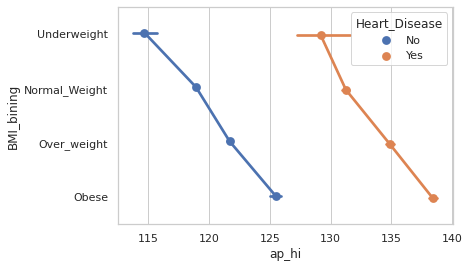

In [ ]:
sns.pointplot(x="ap_hi",y="BMI_bining",  hue="Heart_Disease", data=df_Cardio_updated,dodge=True)

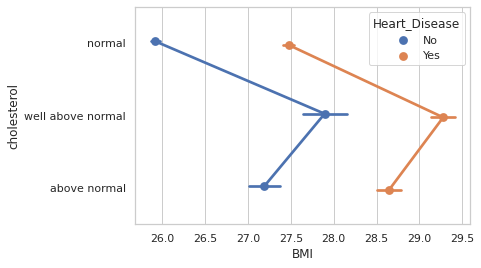

In [ ]:
sns.pointplot(x="BMI",y="cholesterol", hue="Heart_Disease", data=df_Cardio_updated,dodge=True)

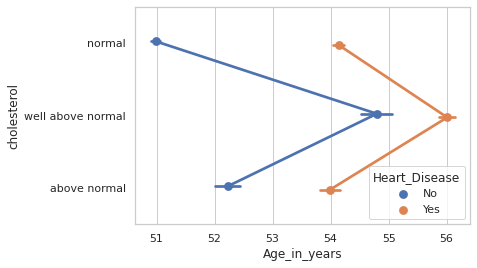

In [ ]:
sns.pointplot(x="Age_in_years",y="cholesterol",  hue="Heart_Disease", data=df_Cardio_updated,dodge=True)


#### **OBSERVATION:**

Our Plots show that the most import variables for detecting Heart Disease are: **cholesterol, Age_in_Years, BMI, ap_hi, ap_lo, and Gender**.

# **Exceptional Work**


## PCA -Principal Component Analysis 

## RANDOM FOREST BASE MODEL FOR COMPARISON

In [ ]:
# What is a RandomForest model accuracy without PCA or LDA.
pca_features_heartdisease = ['height', 'weight', 'ap_hi', 'ap_lo', 'Age_in_years', 'BMI','Heart_Disease']

df_Cardio_RF =df_Cardio_updated[pca_features_heartdisease]
df_Cardio_RF['Heart_Disease']=df_Cardio_RF['Heart_Disease'].replace(('Yes', 'No'),(1, 0))

X= df_Cardio_RF.loc[:,'height':'BMI'].values
y= df_Cardio_RF.Heart_Disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4571 1355]
 [2254 4321]]
Accuracy0.7113030957523399


#### **OBSERVATION:**

Before proceding with any dimensional reduction techniques (Feature Extraction), we ran a randomForest model on our data to set a baseline accuracy. We will evaluate how well PCA and LDA did in comparison to this model. We see that the Accuracy was 71.1%

## PRINCIPAL COMPONENT ANALYSIS

In [ ]:
from matplotlib.transforms import ScaledTranslation
from sklearn.decomposition import PCA
import plotly.express as px


pca_features_no_heartdisease = ['height', 'weight', 'ap_hi', 'ap_lo', 'Age_in_years', 'BMI']
df_Cardio_PCA=df_Cardio_updated[pca_features_heartdisease]

scalar=StandardScaler()
scalar.fit(df_Cardio_PCA[pca_features_no_heartdisease ])
scaled_data=scalar.transform(df_Cardio_PCA[pca_features_no_heartdisease])

pca=PCA(n_components=.99)

pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    x_pca,
    labels=labels,
    dimensions=range(4),
    color=df_Cardio_PCA['Heart_Disease']
)
fig.update_traces(diagonal_visible=False)
fig.show()

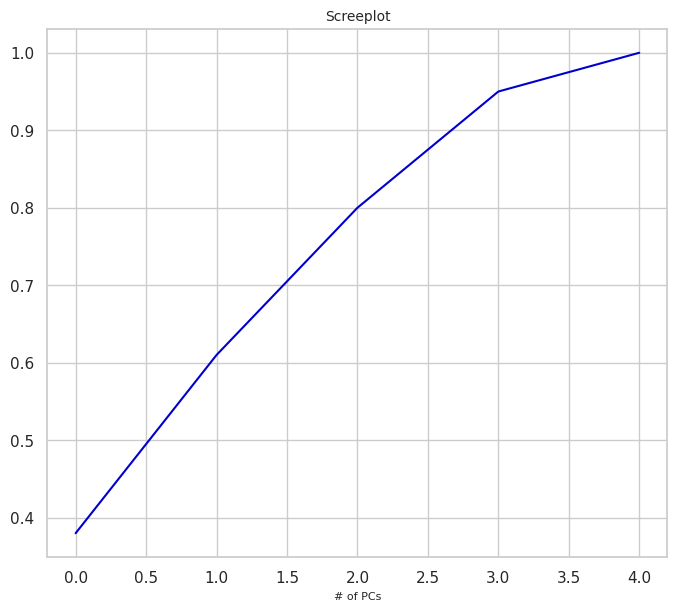

In [ ]:
# Screeplot of PCA

variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(8,7), dpi=100)
plt.plot(variance_exp_cumsum, color='mediumblue')
plt.title('Screeplot', fontsize=10)
plt.xlabel('# of PCs', fontsize=8)
plt.style.context('seaborn-whitegrid')
plt.show()

In [ ]:
# Run a RandomForest Model to gage the PCA performance

df_Cardio_PCA=df_Cardio_updated[pca_features_heartdisease]
df_Cardio_PCA['Heart_Disease']=df_Cardio_PCA['Heart_Disease'].replace(('Yes', 'No'),(1, 0))

X= df_Cardio_PCA.loc[:,'height':'BMI'].values
y= df_Cardio_PCA.Heart_Disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca=PCA(n_components=0.99)

X_train = pca.fit_transform(X_train, y_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4034 1892]
 [1868 4707]]
Accuracy0.699224062075034


####**OBSERVATION:**

<p> After running PCA, we applied a RandomForestClassifier to see how well our PCA would perform. We see that using PCA, gave us a prediction accuracy of 69.9% 

## Linear Discriminant Analysis

In [ ]:
# Use LDA and RandomForest to gage the performance of the LDA

# Reviewed the following page to get a clue on how to apply LDA
# https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/

colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

df_Cardio_LDA=df_Cardio_updated[pca_features_heartdisease]
df_Cardio_LDA['Heart_Disease']=df_Cardio_LDA['Heart_Disease'].replace(('Yes', 'No'),(1, 0))

X= df_Cardio_LDA.loc[:,'height':'BMI'].values
y= df_Cardio_LDA.Heart_Disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

NameError: ignored

#### **OBSERVATION**
After running LDA, we applied a RandomForestClassifier to see how well our LDA will perform. We see that using LDA, gave us a prediction accuracy of 71.5% 